### Libraries

In [2]:
import numpy as np
import pandas as pd
from itertools import combinations
from collections import Counter

import os
from IPython.display import Image

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import networkx as nx

from sklearn.preprocessing import MinMaxScaler
import random
import pickle

## Marvel Network

There is data related to Marvel characters **heroNetwork** dataframe: Contains the network of heroes which appear together in the comics where Hero1 is main hero and Hero2 is the hero that appear with that main hero and by saying apper I mean show in a comic or a movie and count represent number of times they showed together.

In [4]:
# Hero Network Contains the network of heroes which appear together in the comics
heroNetwork = pd.read_csv("herosConnections25.csv")
heroNetwork.head()

,Hero1,Hero2,Count
0,SPIDER-MAN,CAPTAIN AMERICA,145
1,SPIDER-MAN,IRON MAN,95
2,SPIDER-MAN,THING,125
3,SPIDER-MAN,THOR,96
4,SPIDER-MAN,HUMAN TORCH,147


In [5]:
heroNetwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Hero1   300 non-null    object
 1   Hero2   300 non-null    object
 2   Count   300 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [6]:
print("DR. STRANGE & STORM Connection")
display(heroNetwork[(heroNetwork['Hero1']=='DR. STRANGE')&(heroNetwork['Hero2']=='STORM')])
display(heroNetwork[(heroNetwork['Hero1']=='STORM')&(heroNetwork['Hero2']=='DR. STRANGE')])

DR. STRANGE & STORM Connection


,Hero1,Hero2,Count
231,DR. STRANGE,STORM,23


,Hero1,Hero2,Count


## Creating Our Marvel Network

In [7]:
# Initialize an empty undirected graph
marvelNet = nx.Graph() 
for i, row in heroNetwork.iterrows():
    # create a directed edge from Hero1 to Hero2 where weight of that edge is Count
    marvelNet.add_edge(row['Hero1'], row['Hero2'], weight=row['Count'])

In [8]:
# Get positions for the nodes in network
pos = nx.spring_layout(marvelNet, seed=11)

# Get PageRank of all the Heros
pageRank = nx.pagerank(marvelNet, weight='weight')

# Sort PageRank descending order
pageRankSorted = sorted(pageRank.items(), key=lambda item: item[1], reverse=True)

# Hero with the heighest Connections aka pagerank
topHero = pageRankSorted[:1] 
print(topHero)

[('CAPTAIN AMERICA', 0.06669852541066176)]


### Making node size depends on pagerank of that node

In [9]:
nodeSizes = [pageRank[node] * 90000 for node in marvelNet.nodes()]

### Visualize Marvel Network

/home/norhan/.local/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


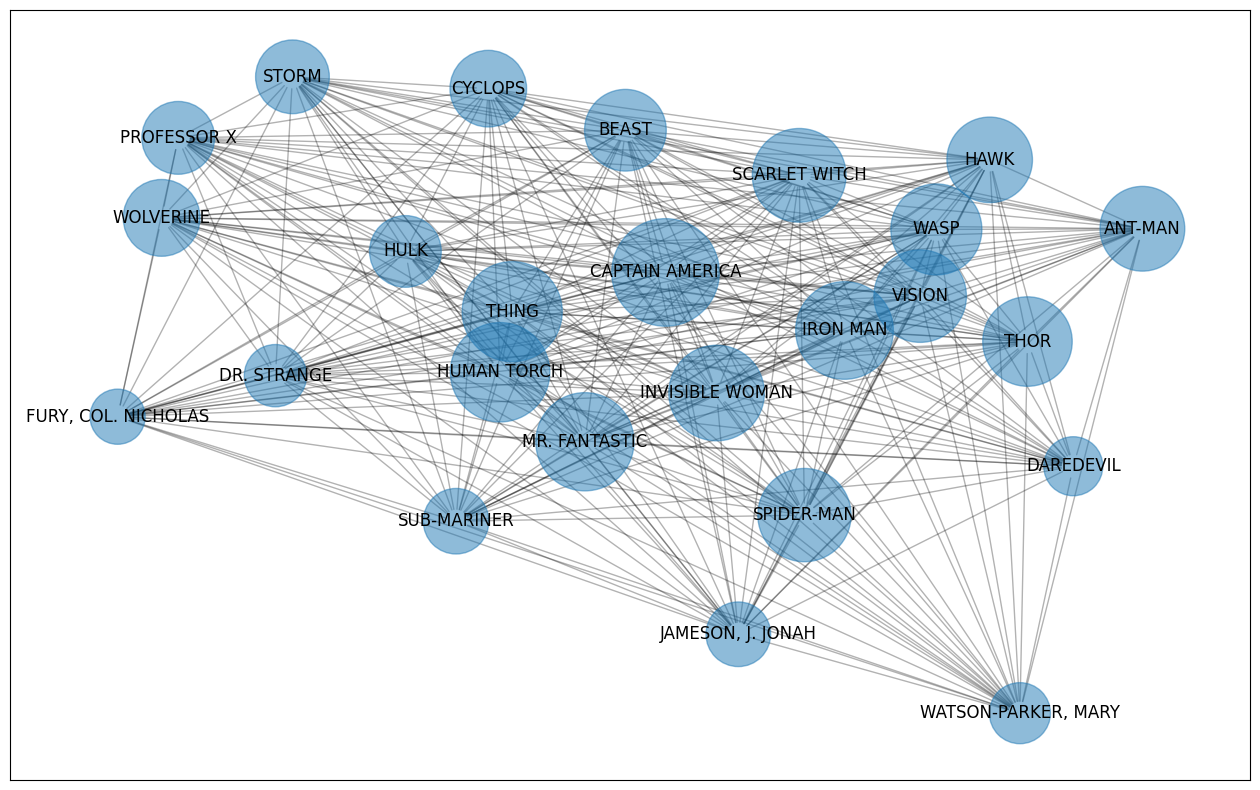

In [10]:
plt.figure(figsize=(16, 10))
nx.draw_networkx_nodes(marvelNet, pos, node_size=nodeSizes, cmap=plt.cm.Dark2, alpha=0.5)

# Draw edges with weights
nx.draw_networkx_edges(marvelNet, pos, alpha=0.3,arrows=True)
edge_labels = nx.get_edge_attributes(marvelNet, 'Count')
nx.draw_networkx_edge_labels(marvelNet, pos, edge_labels=edge_labels)

# Draw labels
nx.draw_networkx_labels(marvelNet, pos)

plt.show()

### To ensure that Captain America has the heighest counts of being main hero

In [80]:
heroNetwork.groupby('Hero1').sum().reset_index().sort_values(by='Count', ascending=False)

,Hero1,Count
2,CAPTAIN AMERICA,4264
18,THING,3403
10,IRON MAN,3065
15,SPIDER-MAN,2874
8,HUMAN TORCH,2504
19,THOR,2028
12,MR. FANTASTIC,1759
14,SCARLET WITCH,1739
23,WOLVERINE,1454
1,BEAST,1257


## Task

#### download dataset to do lab task:https://www.kaggle.com/datasets/mathurinache/twitter-edge-nodes

In [3]:
twitterNetwork = pd.read_csv("Twitter-dataset/data/edges.csv",header=None, names=['Follower','Target'])
#(1,11553) means user (follower) with id "1" is following user (target) with id "11553"
twitterNetwork.head()

,Follower,Target
0,1,11553
1,1,8762940
2,1,8762941
3,1,688136
4,1,8762942


### Create a sub dataframe which represent all network of user **10**

In [23]:


user_10_df = twitterNetwork[(twitterNetwork['Follower'] == 10) | (twitterNetwork['Target'] == 10)]

user_10_df

,Follower,Target
24,3,10
2238093,152189,10
4140215,78418,10
8096776,15079,10
11229170,91180,10
11535641,127900,10
12283865,112221,10
23050354,33899,10
48160511,10,3
48160512,10,151122


In [24]:
user_10_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 24 to 48160551
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Follower  49 non-null     int64
 1   Target    49 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [25]:
# create graph
user_10_net = nx.Graph() 

for i, row in user_10_df.iterrows():
    # create a directed edge from Follower to Target there is no weight
    user_10_net.add_edge(row['Follower'], row['Target'])

### 1.Get positions for the nodes in network

In [26]:
pos = nx.spring_layout(user_10_net, seed=11)


### 2.Get PageRank of all the Users in the network 

In [33]:
pageRank = nx.pagerank(user_10_net, weight='weight')

### 3.Sort PageRank descending order

In [34]:
pageRankSorted = sorted(pageRank.items(), key=lambda item: item[1], reverse=True)

In [35]:
# 4.

In [36]:
topUser = pageRankSorted[:1]
print("User with heighest Connections = ",topUser)

User with heighest Connections =  [(10, 0.46138035175268016)]


### 5.Create nodeSize list for each node

In [31]:
nodeSizes = [pageRank[node] * 90000 for node in user_10_net.nodes()]


/home/norhan/.local/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


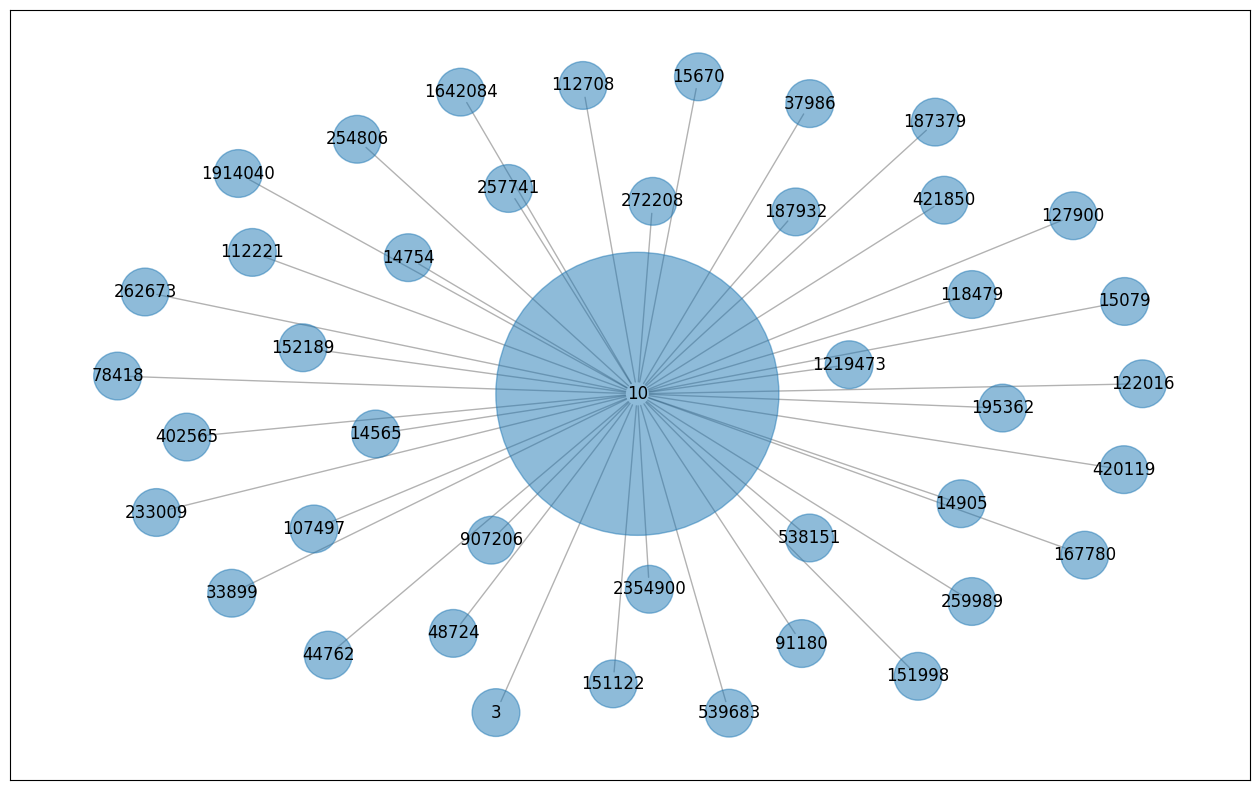

In [32]:
plt.figure(figsize=(16, 10))
# Use nx.draw_networkx_nodes to draw nodes and use nodeSizes to specify each node size
nx.draw_networkx_nodes(user_10_net, pos, node_size=nodeSizes, cmap=plt.cm.Dark2, alpha=0.5)

# Draw a directed edges using draw_networkx_edges 
nx.draw_networkx_edges(user_10_net, pos, alpha=0.3,arrows=True)

# Draw labels
nx.draw_networkx_labels(user_10_net, pos)

plt.show()